# EDA

- Predicting Optimal Fertilizers / June 2025 Kaggle Playground Series. Select the best fertilizer for different weather, soil conditions and crops!

##### Evaluation

MAP@3 -> Put score depends on how they could predict well. For example, if the answer is on the first of prediction 1.0 score, second of prediction then 0.5 score, third of prediction then 0.3 score, if there is no answer on predictions, then 0 score. It often has been used in recommendation algorithm and Searching Information Algorithm 

In [2]:
# Let's see the data first!
from matplotlib import pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 4)
warnings.simplefilter('ignore')

file_dir = Path('../data/')
sub_dir = Path('../sub/')

trn_file = file_dir / 'train.csv'
tst_file = file_dir / 'test.csv'
sub_file = sub_dir / 'sample_submission.csv'

trn = pd.read_csv(trn_file, index_col = 0)
tst = pd.read_csv(tst_file, index_col = 0)

In [3]:
trn.shape

(750000, 9)

First of all, I want to see how data looks like. So, I use shape, and it seems like it has 750000 samples with 9 columns. Let's see more detail

In [4]:
trn.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


They have 8 features(Temparature, Humidity, Moisture...) and one target(Fertilizer Name). Before we jump into detail, Let's see there is Null.

In [8]:
trn.info()
trn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 57.2+ MB


Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

It seems like they don't have any Null. then, let's see some statistical information. and, 6 features are numerical variables and we also have 2 categorical features. It would be better we can manipulate **categorical variables** so that our model can predict better!

I will do that later!

In [6]:
trn.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.0000,750000.0000,750000.0000,750000.0000,750000.0000,750000.0000
mean,31.5036,61.0389,45.1841,23.0938,9.4783,21.0732
std,4.0256,6.6477,11.7946,11.2161,5.7656,12.3468
min,25.0000,50.0000,25.0000,4.0000,0.0000,0.0000
25%,28.0000,55.0000,35.0000,13.0000,4.0000,10.0000
50%,32.0000,61.0000,45.0000,23.0000,9.0000,21.0000
75%,35.0000,67.0000,55.0000,33.0000,14.0000,32.0000
max,38.0000,72.0000,65.0000,42.0000,19.0000,42.0000


Okay, It is good start. We can predict how features are distributed. For example, Temparature, they are around 30 degree, and std is not that big. However, in the case of Nitrogen and Potassium, we can see that variance is really huge. In terms of Potassium, minimum is 0, but maximam is 19. 

Okay, Let's see how target feature looks like.

<Axes: xlabel='Fertilizer Name'>

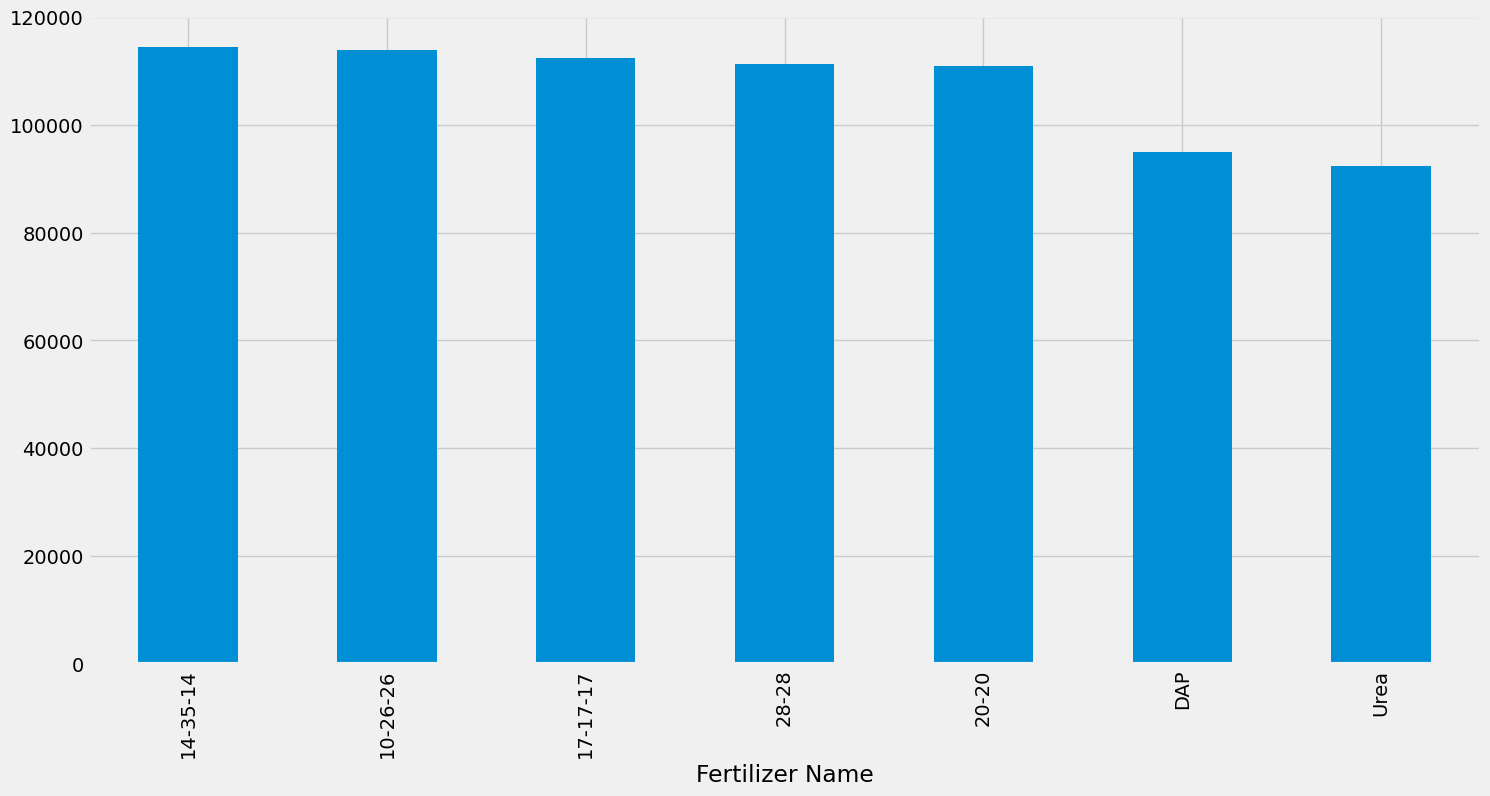

In [10]:
trn[target_col].value_counts().plot(kind='bar')

Good thing is that, distribution of target feature is almost equal. DAP and Urea seem a bit lesser than any other Fertilizer. So, for that, if we use K-Fold, I will use StratifiedKFold.

Okay, it was good to see information by number, but personally I prefer to visualize the data, so that I can understand better by wathcing the data in the graph. So Let's visualize the data distribution. 

First of all, I want to see the distribution of numerical variables. In seaborn, they do not accept object variable as an parameter.

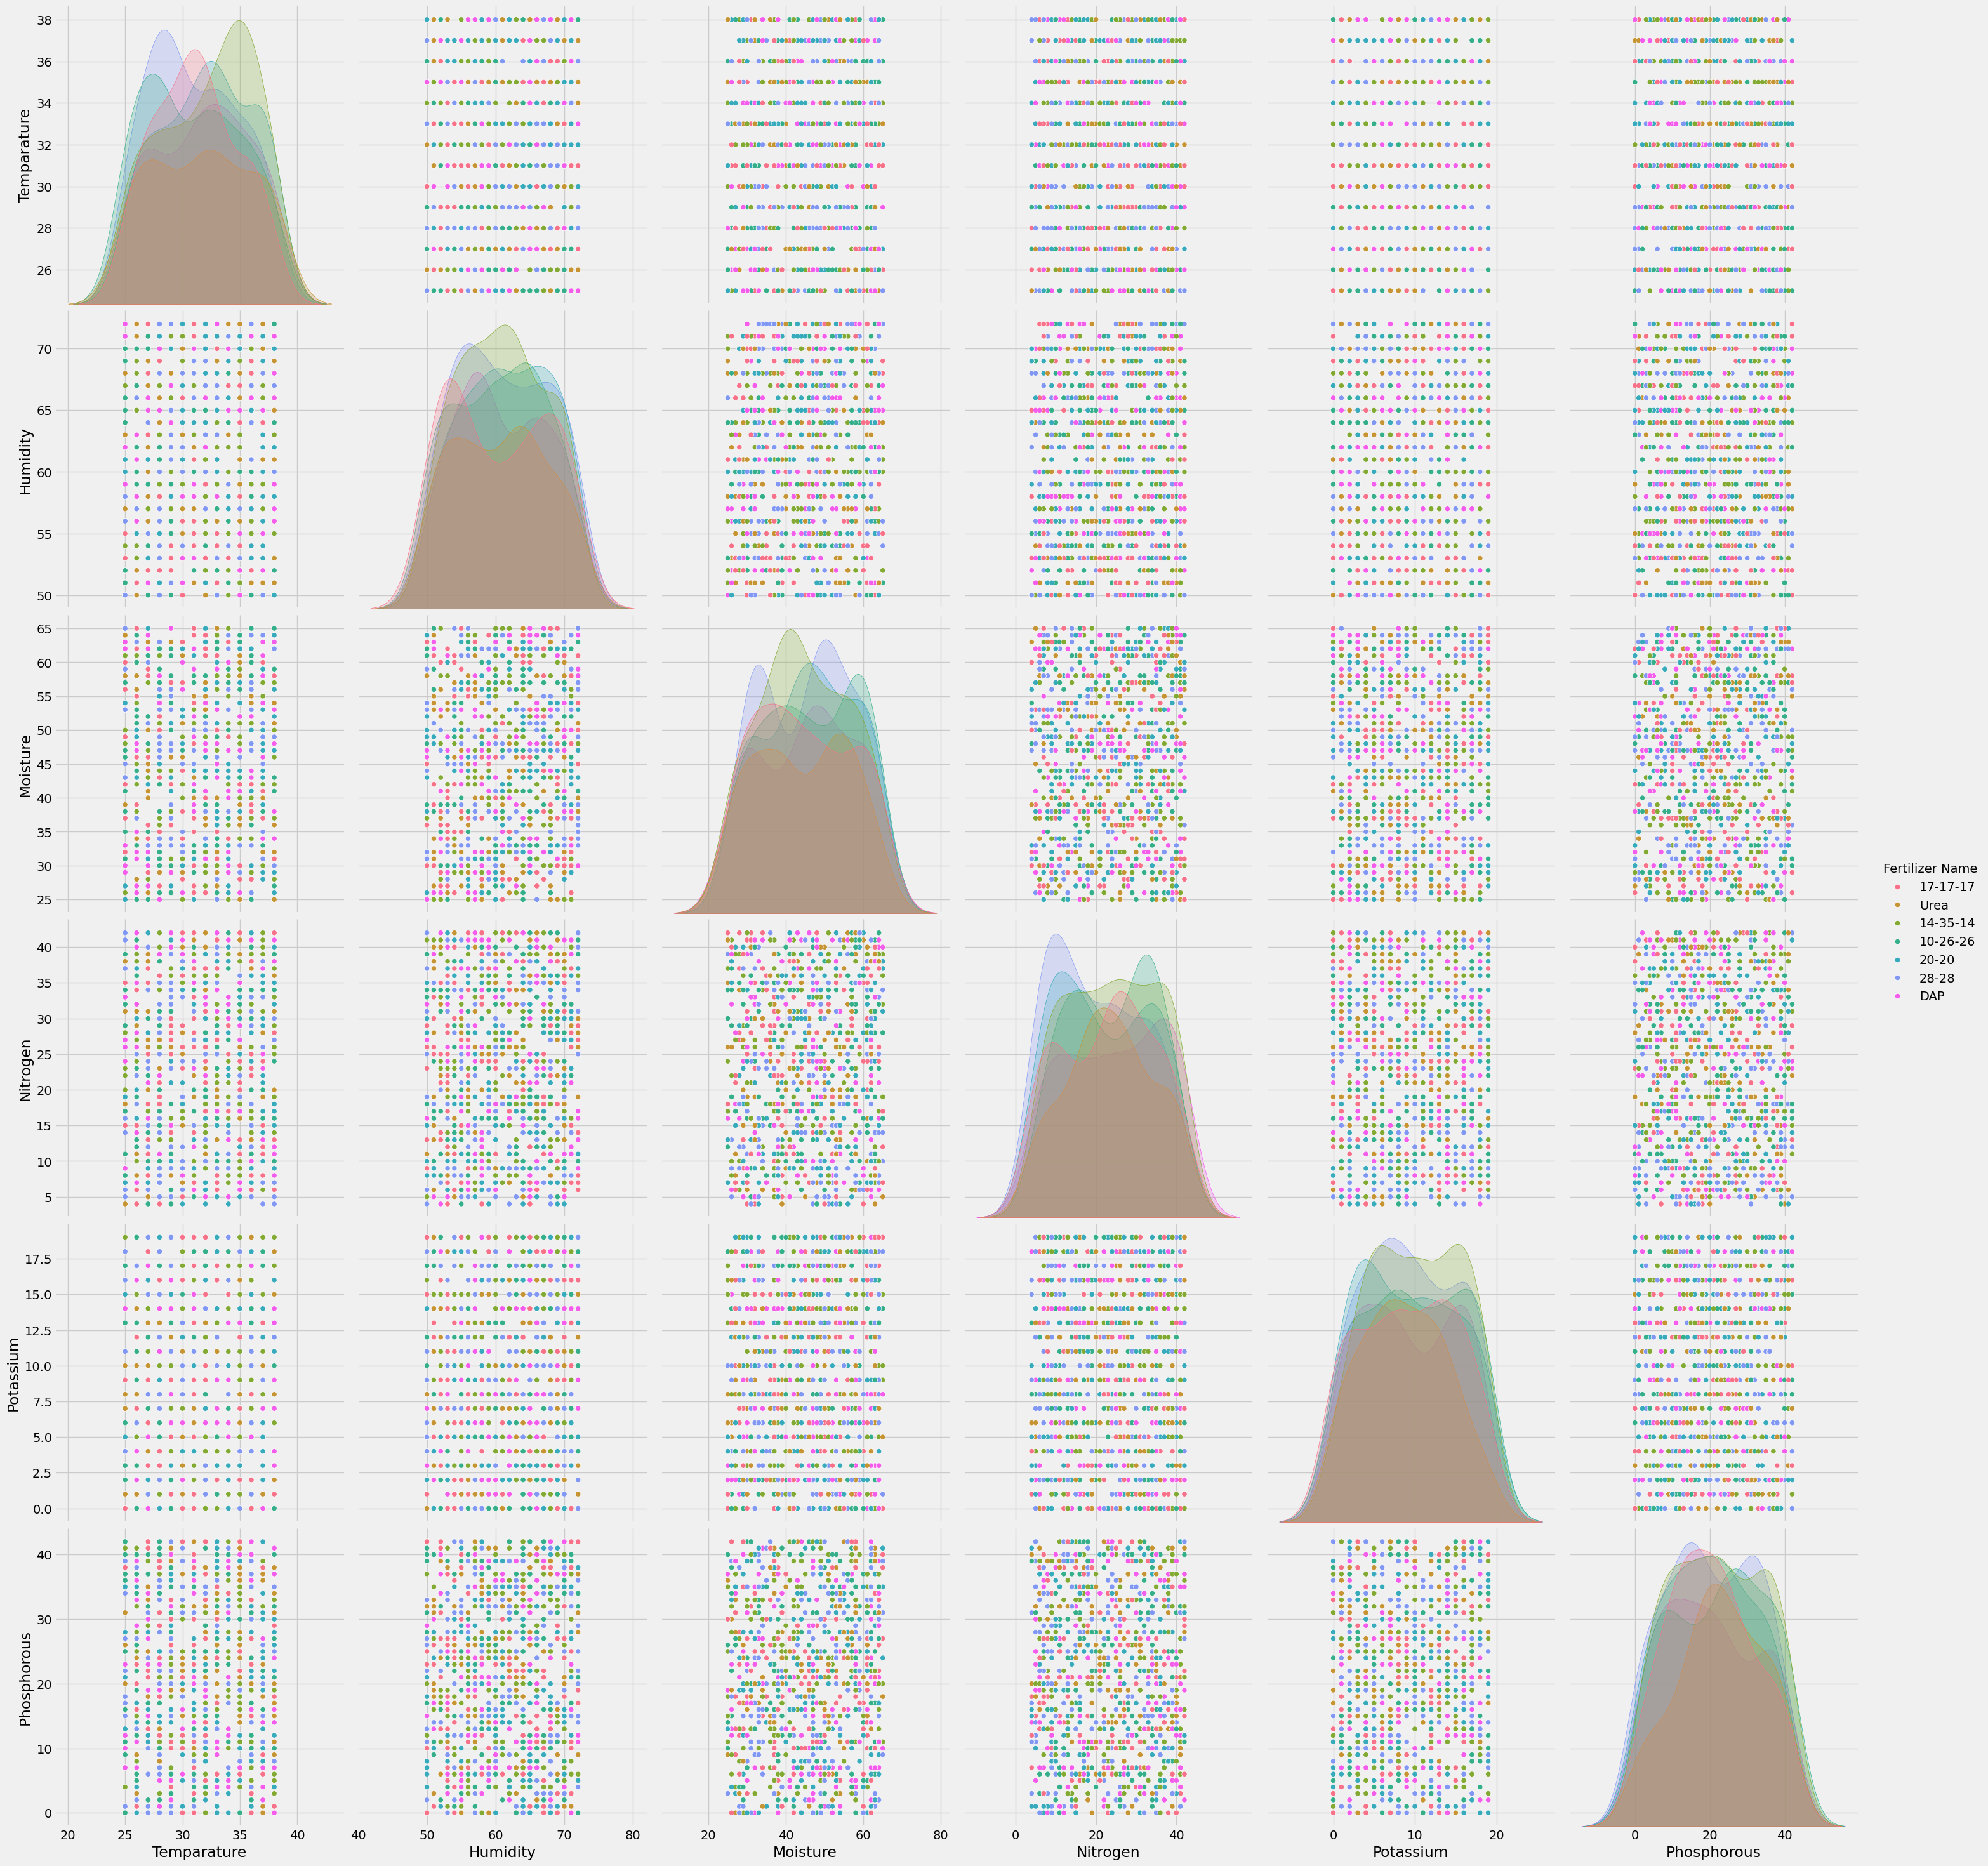

In [17]:
num_cols = trn.select_dtypes(include='number').columns
sns.pairplot(trn.sample(1000), vars = num_cols, size = 5, kind='scatter', hue = target_col)

<Axes: xlabel='Fertilizer Name', ylabel='Moisture'>

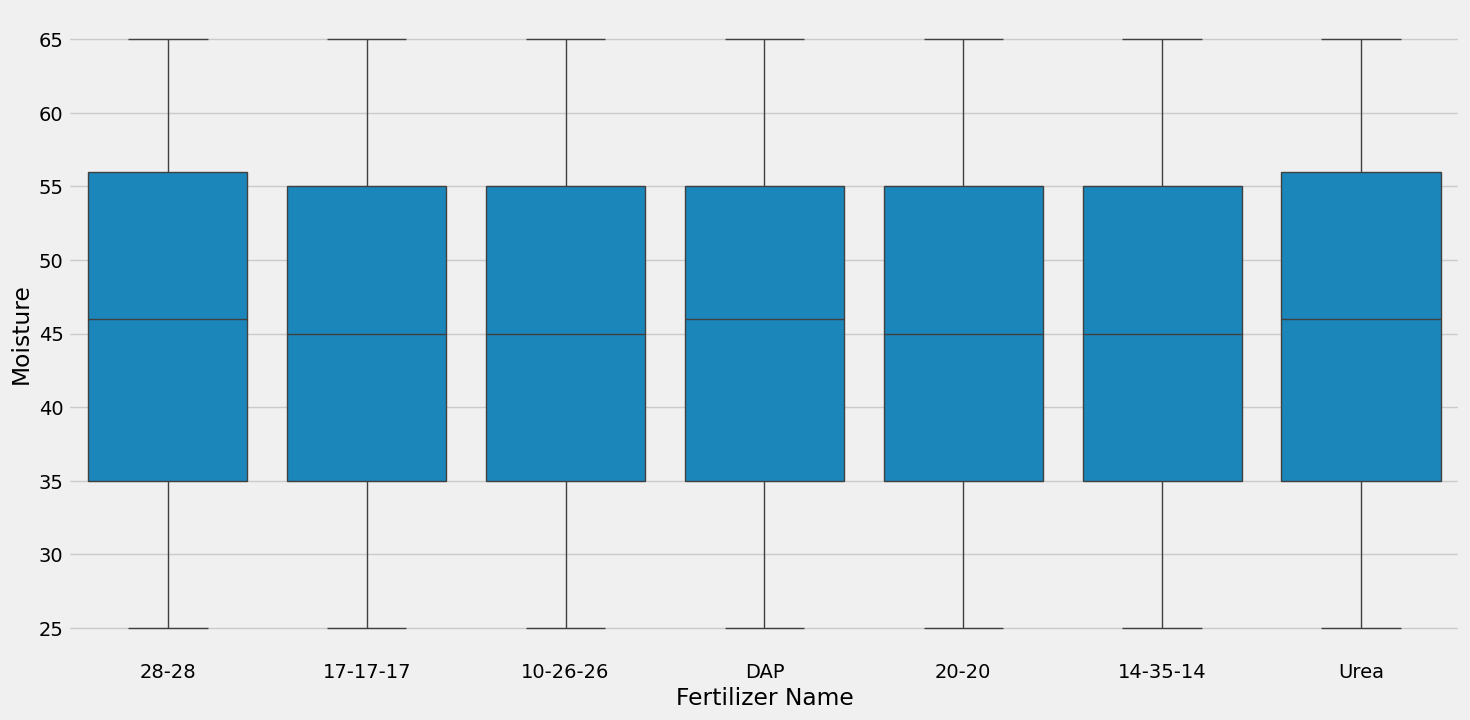

In [20]:
sns.boxplot(data=trn, x=target_col, y="Moisture")

In [ ]:
cat_cols = trn.select_dtypes(include='object').columns
sns.pairplo